In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("mpg.csv")
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
269,23.2,4,156.0,105,2745,16.7,78,1,plymouth sapporo
187,15.5,8,304.0,120,3962,13.9,76,1,amc matador
169,24.0,4,134.0,96,2702,13.5,75,3,toyota corona
49,28.0,4,116.0,90,2123,14.0,71,2,opel 1900


<Axes: >

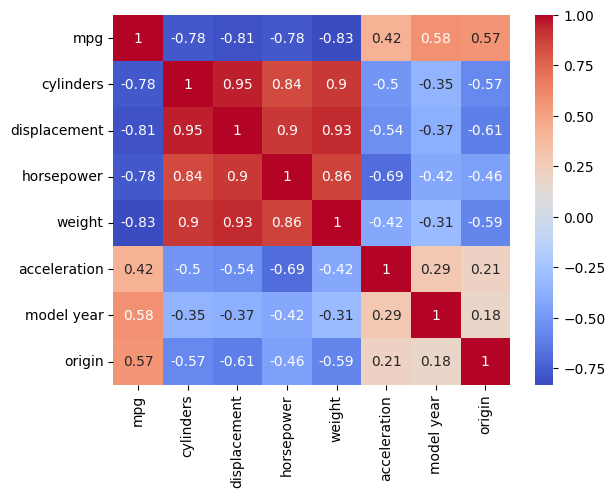

In [4]:
#analise exploratoria
sns.heatmap(df.corr(numeric_only=True),
            annot= True, cmap="coolwarm")

In [5]:
df = df.replace('?', pd.NA).dropna()
df['horsepower'] = df['horsepower'].astype(int)

<Axes: xlabel='mpg'>

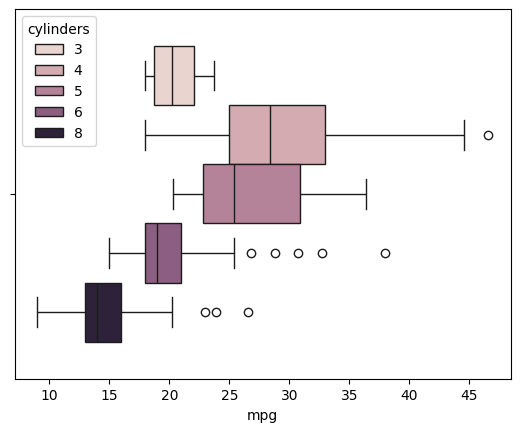

In [6]:
sns.boxplot(df, x="mpg", hue="cylinders")

In [7]:
y = df['mpg']
X = df.drop(columns=['mpg', 'car name', 'origin'])

In [8]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [21]:
#treinando o modelo - floresta
from sklearn.ensemble import RandomForestRegressor

consumo = RandomForestRegressor()
consumo.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
carro = X_test.sample(1)
carro

,cylinders,displacement,horsepower,weight,acceleration,model year
289,8,267.0,125,3605,15.0,79


In [23]:
consumo.predict(carro)

array([20.699])

In [24]:
y_test.sample(1, random_state=42)

132    16.0
Name: mpg, dtype: float64

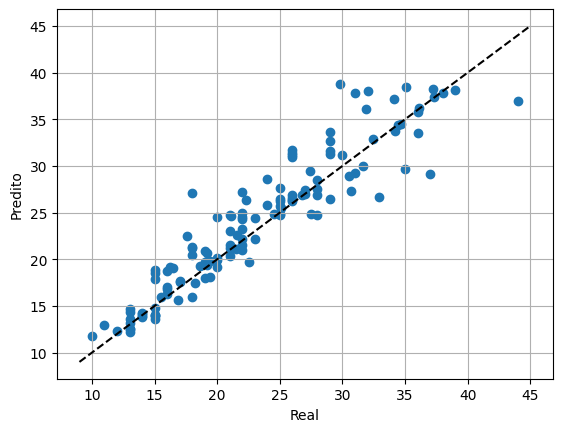

In [28]:
import matplotlib.pyplot as plt

plt.plot([9,45],[9,45], ls="--", c="k")
plt.scatter(y_test, consumo.predict(X_test))
plt.xlabel("Real")
plt.ylabel("Predito")
plt.grid()

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, consumo.predict(X_test), squared=False)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.7720531005569993